### This file performs the pre-processing of the original FER 2013 Dataset and generate pre-processed dataset by applying following Filters:
1. Histogram Equalization + Median Filter
2. Sobel Filter
3. Canny Edge Detection
4. Sharpening Filter - Gaussian + 2D Convolution


### Mounting the Goggle Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Dataset is saved on Google drive as a zip folder. As the dataset is huge and has 35887 training + test images, we are extracting the zip folder in google colab local storage to process the images faster.


In [ ]:
zip_path = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset.zip'
extract_path = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset'

In [ ]:
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    os.makedirs(extract_path, exist_ok=True)
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset


### Above code will take the zip folder as input and extract the image files into local file system

In [ ]:
import os

def count_files(directory):
    total_files = 0
    no_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
        no_files += len(files)
        print(root,dirs,no_files)
        no_files=0
    return total_files

print("Total files extracted:", count_files(extract_path))

/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset ['test', 'train'] 0
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test ['disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'angry'] 0
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/disgust [] 111
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/fear [] 1024
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/happy [] 1774
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/neutral [] 1233
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/sad [] 1247
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/surprise [] 831
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/angry [] 958
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] 0
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry [] 3995
/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/tra

#### Above code displays the count of files that has been extracted locally. We can see that total 35887 files from original zip folder are extracted successfully.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input
from tensorflow.keras.models import Model, load_model
import torch
import os
import matplotlib.pyplot as plt
import cv2

## 1. Histogram Equalization + Median Filter

#### First, on a original image Histogram equalization is applied, and then median filter is applied over it.

### The processed images are saved back to the drive under preprocessed dataset folder

In [7]:
def histogram_equalization(image):
    image = (image * 255).astype(np.uint8)

    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    cdf_normalized = cdf_normalized.astype(np.uint8)

    equalized_image = cdf_normalized[image]

    return equalized_image


def median_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_img = np.pad(image, pad_size, mode='edge')
    filtered_img = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            median_val = np.median(region)
            filtered_img[i, j] = median_val

    return filtered_img



In [ ]:
import os
import cv2
from tqdm import tqdm

input_root = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset'
output_root = '/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Histogram_Median'

valid_exts = ('.jpg', '.jpeg', '.png')

for split in ['train', 'test']:
    split_path = os.path.join(input_root, split)
    output_split_path = os.path.join(output_root, split)

    for emotion in os.listdir(split_path):
        emotion_path = os.path.join(split_path, emotion)
        output_emotion_path = os.path.join(output_split_path, emotion)

        if os.path.isdir(emotion_path):
            os.makedirs(output_emotion_path, exist_ok=True)
            print(f"Processing: {emotion_path}")

            for img_name in tqdm(os.listdir(emotion_path)):
                if img_name.lower().endswith(valid_exts):
                    input_img_path = os.path.join(emotion_path, img_name)
                    output_img_path = os.path.join(output_emotion_path, img_name)

                    img = cv2.imread(input_img_path)
                    if img is None:
                        print(f"Failed to read: {input_img_path}")
                        continue

                    # Apply histogram_equalization
                    hist_img = histogram_equalization(img)

                    # Apply Median Filter on histogram image
                    median_img = median_filter(hist_img)

                    # SAving the image to output path - /Preprocessed_Dataset/Histogram_Median
                    cv2.imwrite(output_img_path, median_img)


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry


  0%|          | 1/3995 [00:00<08:19,  8.00it/s]<ipython-input-17-71e0a01e2756>:7: RuntimeWarning: invalid value encountered in divide
  cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
<ipython-input-17-71e0a01e2756>:9: RuntimeWarning: invalid value encountered in cast
  cdf_normalized = cdf_normalized.astype(np.uint8)
100%|██████████| 3995/3995 [05:41<00:00, 11.72it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/disgust


100%|██████████| 436/436 [00:31<00:00, 13.70it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/fear


100%|██████████| 4097/4097 [05:51<00:00, 11.65it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/happy


100%|██████████| 7215/7215 [10:52<00:00, 11.05it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/neutral


100%|██████████| 4965/4965 [07:28<00:00, 11.08it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/sad


100%|██████████| 4830/4830 [07:14<00:00, 11.10it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/surprise


100%|██████████| 3171/3171 [04:43<00:00, 11.20it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/disgust


100%|██████████| 111/111 [00:08<00:00, 13.15it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/fear


100%|██████████| 1024/1024 [01:20<00:00, 12.65it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/happy


100%|██████████| 1774/1774 [02:37<00:00, 11.24it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/neutral


100%|██████████| 1233/1233 [01:43<00:00, 11.90it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/sad


100%|██████████| 1247/1247 [01:38<00:00, 12.61it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/surprise


100%|██████████| 831/831 [01:03<00:00, 12.99it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/angry


100%|██████████| 958/958 [01:38<00:00,  9.72it/s]


#### Reading a preprocessed training image from the folder.

<ipython-input-6-c6202cbc3f16>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_ori = imread('/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry/Training_1021836.jpg',  pilmode='L')
<ipython-input-6-c6202cbc3f16>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_hist = imread('/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Histogram_Median/train/angry/Training_1021836.jpg',  pilmode='L')


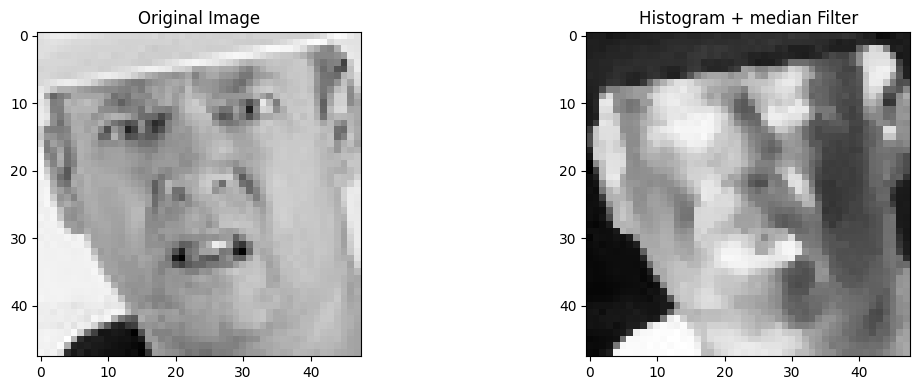

In [6]:
from imageio import imread

img_ori = imread('/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry/Training_1021836.jpg',  pilmode='L')
#img_hist = cv2.imread('/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Histogram_Median/train/angry/Training_1021836.jpg', cv2.COLOR_BGR2GRAY)
img_hist = imread('/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Histogram_Median/train/angry/Training_1021836.jpg',  pilmode='L')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_ori, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(img_hist, cmap='gray')
plt.title("Histogram + median Filter")
plt.tight_layout()
plt.show()

## 2. Sobel Filter

### Applying Sobel Filter to the original dataset and displaying the filtered image example

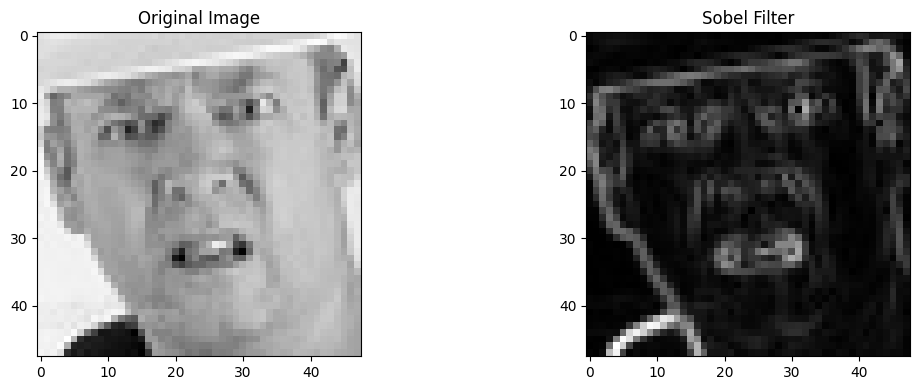

In [10]:
def sobel_edges(image):
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

    Ky = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

    gx = np.zeros_like(image, dtype=np.float32)
    gy = np.zeros_like(image, dtype=np.float32)

    padded = np.pad(image, 1, mode='edge')

    for i in range(1, padded.shape[0]-1):
        for j in range(1, padded.shape[1]-1):
            region = padded[i-1:i+2, j-1:j+2]
            gx[i-1, j-1] = np.sum(Kx * region)
            gy[i-1, j-1] = np.sum(Ky * region)

    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
    return gradient_magnitude.astype(np.uint8)


img_ori = cv2.imread('/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry/Training_1021836.jpg', cv2.COLOR_BGR2GRAY)
edge_img = sobel_edges(img_ori)

preproc_img = edge_img/255.0
image = preproc_img / 255

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_ori, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(preproc_img, cmap='gray')
plt.title("Sobel Filter")
plt.tight_layout()
plt.show()

## 3. Canny Edge Detection

<ipython-input-10-dd6ea68aa80d>:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path, pilmode='L')


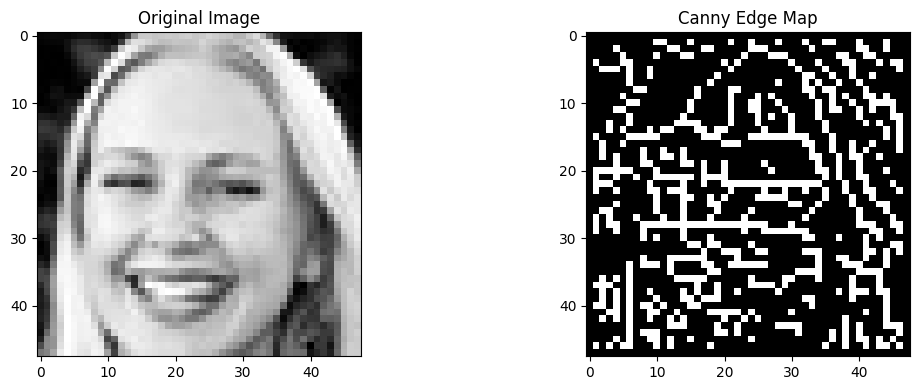

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from imageio import imread
from skimage.measure import regionprops


def canny_edge_detector(image, low_thresh=50, high_thresh=150, sigma=1.4):
    smoothed = gaussian_filter(image, sigma=sigma)

    gx = sobel(smoothed, axis=1)
    gy = sobel(smoothed, axis=0)
    gradient_magnitude = np.hypot(gx, gy)
    gradient_direction = np.arctan2(gy, gx)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

    nms = non_max_suppression(gradient_magnitude, gradient_direction)
    strong_edges = (nms > high_thresh)
    weak_edges = ((nms >= low_thresh) & (nms <= high_thresh))

    final_edges = hysteresis(strong_edges, weak_edges)
    return final_edges.astype(np.uint8) * 255, gradient_direction

def non_max_suppression(grad, direction):
    M, N = grad.shape
    Z = np.zeros((M, N), dtype=np.float32)
    angle = direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = grad[i, j+1]
                    r = grad[i, j-1]
                elif (22.5 <= angle[i,j] < 67.5):
                    q = grad[i+1, j-1]
                    r = grad[i-1, j+1]
                elif (67.5 <= angle[i,j] < 112.5):
                    q = grad[i+1, j]
                    r = grad[i-1, j]
                elif (112.5 <= angle[i,j] < 157.5):
                    q = grad[i-1, j-1]
                    r = grad[i+1, j+1]

                if (grad[i,j] >= q) and (grad[i,j] >= r):
                    Z[i,j] = grad[i,j]
                else:
                    Z[i,j] = 0

            except IndexError:
                pass
    return Z

def hysteresis(strong, weak):
    M, N = strong.shape
    edges = np.copy(strong)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if weak[i, j] and np.any(strong[i-1:i+2, j-1:j+2]):
                edges[i, j] = True
    return edges

# ----------------Example Image output ---------------- #

def run_pipeline(image_path):

    image = imread(image_path, pilmode='L')
    edges, directions = canny_edge_detector(image)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Map")
    plt.tight_layout()
    plt.show()

img_path = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/happy/Training_98887482.jpg'
run_pipeline(img_path)


## Applying Canny Edge detection on Original Dataset

In [ ]:
import os
import cv2
from tqdm import tqdm


input_root = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset'
output_root = '/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Canny'

valid_exts = ('.jpg', '.jpeg', '.png')

for split in ['train', 'test']:
    split_path = os.path.join(input_root, split)
    output_split_path = os.path.join(output_root, split)

    for emotion in os.listdir(split_path):
        emotion_path = os.path.join(split_path, emotion)
        output_emotion_path = os.path.join(output_split_path, emotion)

        if os.path.isdir(emotion_path):
            os.makedirs(output_emotion_path, exist_ok=True)
            print(f"Processing: {emotion_path}")

            for img_name in tqdm(os.listdir(emotion_path)):
                if img_name.lower().endswith(valid_exts):
                    input_img_path = os.path.join(emotion_path, img_name)
                    output_img_path = os.path.join(output_emotion_path, img_name)

                    # ------Read image---------
                    img = imread(input_img_path, pilmode='L')
                    if img is None:
                        print(f"Failed to read: {input_img_path}")
                        continue

                    # Apply Canny Edge Detection
                    edges, directions = canny_edge_detector(img)

                    # Save processed image to /CVIP_Project/Preprocessed_Dataset/Canny
                    cv2.imwrite(output_img_path, edges)

Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry


  0%|          | 0/3995 [00:00<?, ?it/s]<ipython-input-11-a7c3ac598a03>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(input_img_path, pilmode='L')
  0%|          | 11/3995 [00:03<19:49,  3.35it/s]<ipython-input-10-dd6ea68aa80d>:16: RuntimeWarning: invalid value encountered in divide
  gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
100%|██████████| 3995/3995 [02:44<00:00, 24.32it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/disgust


100%|██████████| 436/436 [00:15<00:00, 27.33it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/fear


100%|██████████| 4097/4097 [04:27<00:00, 15.32it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/happy


100%|██████████| 7215/7215 [07:30<00:00, 16.02it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/neutral


100%|██████████| 4965/4965 [04:35<00:00, 17.99it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/sad


100%|██████████| 4830/4830 [04:37<00:00, 17.43it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/surprise


100%|██████████| 3171/3171 [02:46<00:00, 19.00it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/disgust


100%|██████████| 111/111 [00:07<00:00, 14.25it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/fear


100%|██████████| 1024/1024 [00:54<00:00, 18.76it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/happy


100%|██████████| 1774/1774 [01:28<00:00, 19.96it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/neutral


100%|██████████| 1233/1233 [00:58<00:00, 21.16it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/sad


100%|██████████| 1247/1247 [01:03<00:00, 19.74it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/surprise


100%|██████████| 831/831 [00:29<00:00, 27.97it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/angry


100%|██████████| 958/958 [00:47<00:00, 20.26it/s]


## 4. Sharpening - Gaussian + 2D Convolution

In [11]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image

# Manual implementation of Gaussian Kernel
def gaussian_kernel(size=3, sigma=1.0):
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Manual implementation of 2D convolution with symmetric padding
def convolution_2D(image, kernel):

    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='symmetric')

    output = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output

def unsharp_mask(img_pil, strength=1.5, kernel_size=3, sigma=1.0):
    img = np.array(img_pil).astype(np.float32)

    # Step 1: Create a Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Step 2: Apply 2D convolution
    if img.ndim == 2:
        blurred = convolution_2D(img, kernel)
    else:
        blurred = np.stack([
            convolution_2D(img[:, :, c], kernel)
            for c in range(img.shape[2])
        ], axis=2)

    # Step 3: Unsharp masking
    mask = img - blurred
    sharpened = img + strength * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return Image.fromarray(sharpened)

In [ ]:
import os
import cv2
from tqdm import tqdm


input_root = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset'
output_root = '/content/drive/MyDrive/UB_Study/CVIP_Project/Preprocessed_Dataset/Sharpened'

valid_exts = ('.jpg', '.jpeg', '.png')

for split in ['train', 'test']:
    split_path = os.path.join(input_root, split)
    output_split_path = os.path.join(output_root, split)

    for emotion in os.listdir(split_path):
        emotion_path = os.path.join(split_path, emotion)
        output_emotion_path = os.path.join(output_split_path, emotion)

        if os.path.isdir(emotion_path):
            os.makedirs(output_emotion_path, exist_ok=True)
            print(f"Processing: {emotion_path}")

            for img_name in tqdm(os.listdir(emotion_path)):
                if img_name.lower().endswith(valid_exts):
                    input_img_path = os.path.join(emotion_path, img_name)
                    output_img_path = os.path.join(output_emotion_path, img_name)

                    # Read image
                    img = imread(input_img_path, pilmode='L')
                    if img is None:
                        print(f"Failed to read: {input_img_path}")
                        continue

                    # Apply Unsharp_mask
                    sharp_img = unsharp_mask(img, strength=2, kernel_size=3, sigma=1.0)


                    # Save to processed folder CVIP_Project/Preprocessed_Dataset/Sharpened
                    cv2.imwrite(output_img_path, np.array(sharp_img))

Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry


  0%|          | 0/3995 [00:00<?, ?it/s]<ipython-input-41-3e6d57c17179>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(input_img_path, pilmode='L')
100%|██████████| 3995/3995 [03:13<00:00, 20.69it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/disgust


100%|██████████| 436/436 [00:13<00:00, 33.02it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/fear


100%|██████████| 4097/4097 [05:07<00:00, 13.32it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/happy


100%|██████████| 7215/7215 [11:28<00:00, 10.48it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/neutral


100%|██████████| 4965/4965 [06:48<00:00, 12.14it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/sad


100%|██████████| 4830/4830 [06:27<00:00, 12.46it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/surprise


100%|██████████| 3171/3171 [03:41<00:00, 14.31it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/disgust


100%|██████████| 111/111 [00:04<00:00, 25.98it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/fear


100%|██████████| 1024/1024 [00:43<00:00, 23.46it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/happy


100%|██████████| 1774/1774 [01:17<00:00, 22.86it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/neutral


100%|██████████| 1233/1233 [00:50<00:00, 24.36it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/sad


100%|██████████| 1247/1247 [00:50<00:00, 24.53it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/surprise


100%|██████████| 831/831 [00:32<00:00, 25.34it/s]


Processing: /content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/test/angry


100%|██████████| 958/958 [00:39<00:00, 24.29it/s]


### Applying sharpened filter for below example images

<ipython-input-12-e63edb5385bc>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path, pilmode='L')


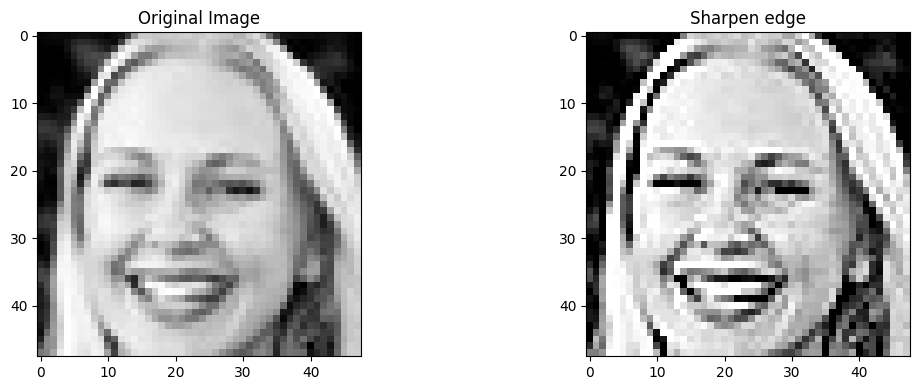

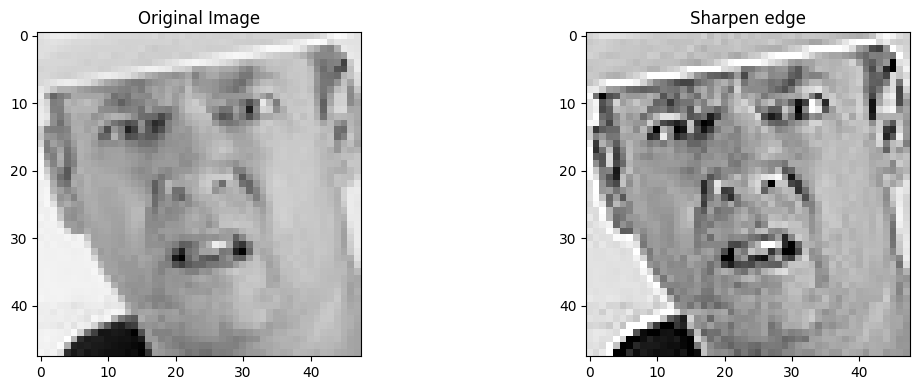

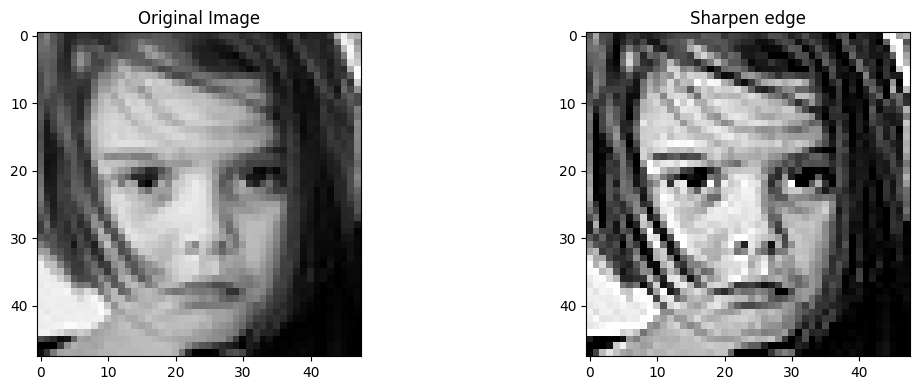

In [12]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel, label, find_objects
from imageio import imread
from skimage.measure import regionprops

# conv_kernel = np.array([[0, -1, 0],
#                         [-1, 5, -1],
#                         [0, -1, 0]], dtype=np.float32)

def run_pipeline(image_path):

    image = imread(image_path, pilmode='L')

    filtered_img = unsharp_mask(image, strength=2, kernel_size=3, sigma=1.0)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title("Sharpen edge")
    plt.tight_layout()
    plt.show()

# ----------- Execute for image examples ----------- #
img_path = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/happy/Training_98887482.jpg'
run_pipeline(img_path)

img_path = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/angry/Training_1021836.jpg'
run_pipeline(img_path)

img_path = '/content/drive/MyDrive/UB_Study/CVIP_Project/FERDataset/train/sad/Training_99943858.jpg'
run_pipeline(img_path)


All the above filter techniques are applied on the original dataset and created new filtered dataset by saving the pre-processed images for further implementation.